In [4]:
%load_ext autoreload
%autoreload 2
import numpy as np; np.set_printoptions(precision=2, threshold=100); np.random.seed(0)
import torch; torch.set_printoptions(precision=2, threshold=100)
seed = 1 

torch.manual_seed(seed)
import torch.nn as nn
import matplotlib.pyplot as plt; plt.rc('font', size=12)
import matplotlib   

from matplotlib.font_manager import FontProperties
from mpl_toolkits import mplot3d
import matplotlib.pylab as plt

import seaborn as sns
import time
import sys 
import itertools
import random; random.seed(0)
import datetime
import pickle
import copy
import pandas as pd
import scipy
import os

from sklearn.cluster import KMeans
from sklearn.manifold import MDS
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

import sys
sys.path.insert(0, '/path/to/your/module/directory')
# from task_new import *
from functions import *
# from train_working import *
# from model_working import *


print(torch.__version__)
print(sys.version)
                
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2.5.1
3.10.16 (main, Dec 11 2024, 10:24:41) [Clang 14.0.6 ]


# Figure 1c

In [ ]:
with open('/.../perfs_across_models.pickle', 'rb') as handle:
    perfs_across_models = pickle.load(handle)

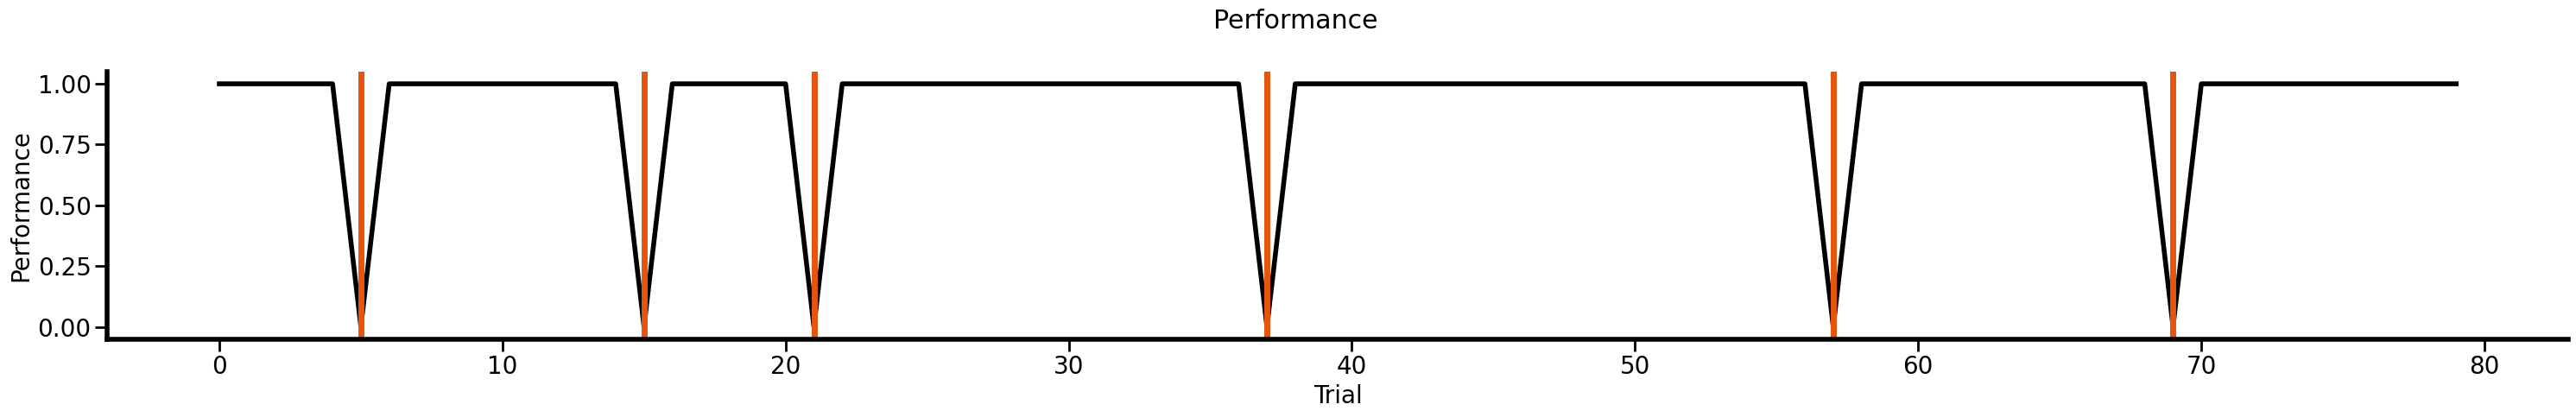

In [78]:
# plot performance as a function of trial number
for data in perfs_across_models:
    if data['model'] != 'success_2023-05-10-14-28-42_wcst_136_sparsity0':    # example network 
        continue
    perfs = [_[0] for _ in data['perfs']]
    # perf_rules = [_[0] for _ in data['perf_rules']]
    switch_trials = data['switch_trials']
    
    fig, ax = plt.subplots(1, 1, figsize=[30, 5])
    fig.suptitle('Performance')
    ax.set_xlabel('Trial', fontsize=20)
    ax.set_ylabel('Performance', fontsize=20)
    ax.plot(perfs, color='k', linewidth=4)
    for tr in switch_trials:
        ax.axvline(x=tr+1, color='#e6550d', linewidth=5)
    make_pretty_axes(ax)
    fig.tight_layout()
    plt.show()
    # fig.savefig('/home/yl4317/Documents/two_module_rnn/figs/perf_fast_switching_model.pdf')
    # pd.DataFrame.from_dict(data={'perf': perfs}, orient='index').to_csv('/home/yl4317/Documents/two_module_rnn/source_data/fig1c.csv', header=False)

# Figure 1d

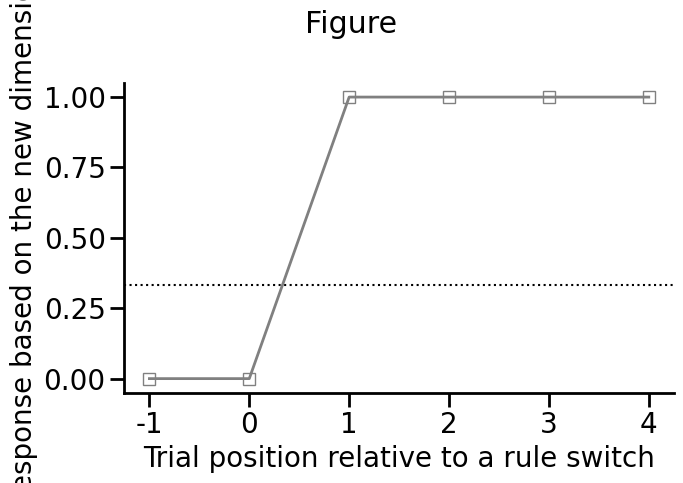

In [87]:
for data in perfs_across_models:
    if data['model'] != 'success_2023-05-10-14-28-42_wcst_136_sparsity0':    # example network 
        continue
    perfs = [_[0] for _ in data['perfs']]
    fig, perf_after_switch = plot_perf_after_switch(switch_trials=data['switch_trials'], perfs=perfs, n_trs_max=6)
    # fig.savefig('/home/yl4317/Documents/two_module_rnn/figs/perf_after_switch_fast_switching_model.pdf')
    # pd.DataFrame.from_dict(data=perf_after_switch, orient='index').to_csv('/home/yl4317/Documents/two_module_rnn/source_data/fig1d.csv', header=False)

# Figure 1f - performance of the slow switching model

In [88]:
with open('/.../perfs_across_slow_switching_models.pickle', 'rb') as handle:
    perfs_across_models_slow = pickle.load(handle)

success_2023-12-22-16-37-35_wcst_2_early_stopping_correct2


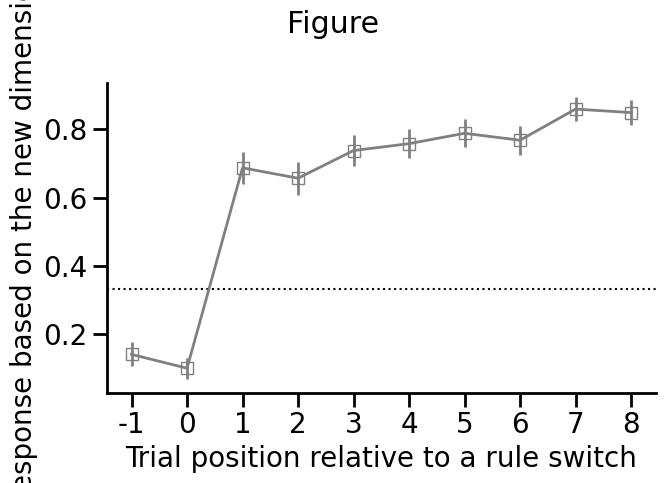

In [91]:
for data in perfs_across_models_slow:
    print(data['model'])
    perfs = [_[0] for _ in data['perfs']]
    fig, perf_after_switch = plot_perf_after_switch(switch_trials=data['switch_trials'], perfs=perfs, n_trs_max=10)
    # fig.savefig('/home/yl4317/Documents/two_module_rnn/figs/perf_after_switch_slow_switching_model.pdf')
    # pd.DataFrame.from_dict(data=perf_after_switch, orient='index').to_csv('/home/yl4317/Documents/two_module_rnn/source_data/fig1f.csv', header=False)